# 라이브러리 & 함수 호출

In [1]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Data manipulation and visualization
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Modeling algorithms
# General
import statsmodels.api as sm
from scipy import stats

# Model selection
from sklearn.model_selection import train_test_split

# Evaluation metrics
from sklearn import metrics
# for classification
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# 한글 패치
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

# 결측값 시각화 모듈
import missingno as msno

In [2]:
# Ignore the warnings
import warnings
# warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# System related and data input controls
import os

# Data manipulation and visualization
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import  OrdinalEncoder
from sklearn.preprocessing import StandardScaler

# Modeling algorithms
# General
import statsmodels.api as sm
from scipy import stats

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree, export_text, export_graphviz
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from xgboost import plot_importance as plot_importance_xgb
from lightgbm import plot_importance as plot_importance_lgbm
from catboost import Pool, CatBoostClassifier
from mlxtend.classifier import StackingClassifier, StackingCVClassifier
from mlxtend.plotting import plot_decision_regions

from sklearn.ensemble import ExtraTreesClassifier

# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV

# Evaluation metrics
from sklearn import metrics
# for classification
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Undersampling
from imblearn.under_sampling import RandomUnderSampler

# Evaluation metrics
from sklearn import metrics
# for classification
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             roc_curve, auc, precision_score, recall_score, f1_score)

from sklearn.impute import SimpleImputer
from imblearn.under_sampling import RandomUnderSampler

#shap
import shap

# macOS에서 한글 폰트 설정 (AppleGothic 또는 NanumGothic)
import matplotlib.pyplot as plt
import matplotlib

# matplotlib.rcParams['font.family'] = 'NanumGothic'  # 또는 'NanumGothic' , 'AppleGothic'
# matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 제대로 표시

In [3]:
# 데이터 분리
def datasplit(df, Y_colname, test_size=0.2, random_state=123):
    X_colname = [x for x in df.columns if x not in Y_colname]

    X_train, X_test, Y_train, Y_test = train_test_split(df[X_colname], df[Y_colname],
                                                        test_size=test_size, random_state=random_state)
    print(X_train.shape, Y_train.shape)
    print(X_test.shape, Y_test.shape)

    return X_train, X_test, Y_train, Y_test

# 스케일 조정
def scale(scaler, X_train, X_test):
    scaler_fit = scaler.fit(X_train)
    X_train_scaling = pd.DataFrame(scaler_fit.transform(X_train),
                                   index=X_train.index, columns=X_train.columns)
    X_test_scaling = pd.DataFrame(scaler_fit.transform(X_test),
                                  index=X_test.index, columns=X_test.columns)

    return X_train_scaling, X_test_scaling


# UnderSampling
def undersampling(X_train, Y_train, method='OneSidedSelection', strategy='auto', random_state=123):
    print('Ratio of Origin Y_train: ', Y_train.value_counts())
    if method == 'RandomUnderSampler':
        sampler = RandomUnderSampler(sampling_strategy=strategy, random_state=random_state)
    elif method == 'TomekLinks':
        sampler = TomekLinks(sampling_strategy=strategy)
    elif method == 'CondensedNearestNeighbour':
        sampler = CondensedNearestNeighbour(sampling_strategy=strategy, random_state=random_state)
    elif method == 'OneSidedSelection':
        sampler = OneSidedSelection(sampling_strategy=strategy, random_state=random_state)

    # 축소
    X_train, Y_train = sampler.fit_resample(X_train, Y_train)
    print('Ratio of Sapling Y_train: ', Y_train.value_counts())

    return sampler, X_train, Y_train



In [4]:
# Confusion Matrix 함수화
def evaluation_class_ConfusionMatrix(Y_true, Y_pred):
    conf_mat = confusion_matrix(Y_true>=0.5, Y_pred)
    conf_mat = pd.DataFrame(conf_mat,
                            index=['True: 0', 'True: 1'],
                            columns=['Pred: 0', 'Pred: 1'])

    return conf_mat


# Classification Report 함수화
def evaluation_class_ClassificationReport(Y_true, Y_pred):
    print(classification_report(Y_true, Y_pred,
                                target_names=['class 0', 'class 1']))


# ROC Curve & AUC 함수화
def evaluation_class_ROCAUC(Y_true, P_pred, figsize=(10,5)):
    fpr, tpr, thresholds = roc_curve(Y_true, P_pred)
    cm = evaluation_class_ConfusionMatrix(Y_true, P_pred>=0.5)
    recall = cm.iloc[1,1] / cm.sum(axis=1).values[1]
    fallout = cm.iloc[0,1] / cm.sum(axis=1).values[0]

    plt.figure(figsize=figsize)
    plt.plot(fpr, tpr, label='Logistic Regression')
    plt.plot([0, 1], [0, 1],'r--')
    plt.plot([fallout], [recall], 'ro', ms=10)
    plt.title('AUC: ' + str(auc(fpr, tpr)), fontsize=15)
    plt.xlabel('False Positive Rate', fontsize=15)
    plt.ylabel('True Positive Rate', fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.grid()
    plt.show()

# Precision & Recall Curve 함수화
def evaluation_class_PrecisionRecall(Y_true, P_pred, figsize=(10,5)):
    pre, rec, thresholds = precision_recall_curve(Y_true, P_pred)

    plt.figure(figsize=figsize)
    plt.plot(thresholds, pre[:-1], label='Precision')
    plt.plot(thresholds, rec[1:], label='Recall')
    plt.xlabel('Threshold', fontsize=15)
    plt.ylabel('', fontsize=15)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(loc='best', fontsize=12)
    plt.grid()
    plt.show()

def evaluation_class_AccuracyAUC(Y_real, Y_pred_prob):
    # 0.5 기준으로 확률을 이진 레이블로 변환하여 accuracy 계산
    Y_pred_label = np.where(Y_pred_prob >= 0.5, 1, 0)
    accuracy = accuracy_score(Y_real, Y_pred_label)
    roc_auc = roc_auc_score(Y_real, Y_pred_prob)  # 확률 값을 그대로 사용
    result = pd.DataFrame({'Accuracy': [accuracy], 'ROC_AUC': [roc_auc]})
    return result

def evaluation_class_AccuracyAUC_trte(Y_real_tr, Y_pred_tr_prob, Y_real_te, Y_pred_te_prob):
    Score_tr = evaluation_class_AccuracyAUC(Y_real_tr, Y_pred_tr_prob)
    Score_te = evaluation_class_AccuracyAUC(Y_real_te, Y_pred_te_prob)
    Score_trte = pd.concat([Score_tr, Score_te], axis=0)
    Score_trte.index = ['Train', 'Test']
    return Score_trte

# 전처리

## 종속변수 설정

In [5]:
# 종속변수 설정 (0 : 참여안함, 1 : 참여함)
def Y_variable(df):
    
    # 평생학습 효과성
    df['평생학습 효과성'] = df[['문H2-1) 평생학습 참여가 삶의 질 향상에 얼마나 도움^ 아직 경험이 없다면 삶의 질 향상에 얼마나 도움이 될 것인지 생각하십니까?__1) 정신적 건강(정서적 안정감)',
                                  '문H2-1) 평생학습 참여가 삶의 질 향상에 얼마나 도움^ 아직 경험이 없다면 삶의 질 향상에 얼마나 도움이 될 것인지 생각하십니까?__2) 육체적 건강',
                                  '문H2-1) 평생학습 참여가 삶의 질 향상에 얼마나 도움^ 아직 경험이 없다면 삶의 질 향상에 얼마나 도움이 될 것인지 생각하십니까?__3) 사회참여 만족도',
                                  '문H2-1) 평생학습 참여가 삶의 질 향상에 얼마나 도움^ 아직 경험이 없다면 삶의 질 향상에 얼마나 도움이 될 것인지 생각하십니까?__4) 경제적 안정감']].mean(axis=1)
        
    # 조건에 따라 이진값 부여: 3.0미만은 불만족(0), 4.0 이상은 만족(1), 나머지 삭제 
    df['평생학습 만족도'] = df['평생학습 효과성'].apply(
        lambda x: 0 if x < 3.0 else (1 if x >=4.0 else None)
    )

    # None(=nan)이 들어간 행 제거
    df = df.dropna(subset=['평생학습 만족도'])
    
    # 원래 인덱스 초기화
    df = df.reset_index(drop=True)
    
    return df

In [6]:
# 형식, 비형식 유형별 컬럼 재분류 함수
def reclassify_program(x):
    if 1 <= x <= 10:
        return 1
    elif x == 11:
        return 2
    elif 12 <= x <= 17:
        return 3
    elif 18 <= x <= 24:
        return 4
    elif 25 <= x <= 27:
        return 5
    elif 28 <= x <= 30:
        return 6
    else:
        return np.nan

In [7]:
# 파생변수 생성 함수
def derived_variable(df):
    # 파생변수 변환 컬럼 선택
    col_groups1 = {
#         '평생학습 효과성 평균': [
#             '문H2-1) 평생학습 참여가 삶의 질 향상에 얼마나 도움^ 아직 경험이 없다면 삶의 질 향상에 얼마나 도움이 될 것인지 생각하십니까?__1) 정신적 건강(정서적 안정감)',
#             '문H2-1) 평생학습 참여가 삶의 질 향상에 얼마나 도움^ 아직 경험이 없다면 삶의 질 향상에 얼마나 도움이 될 것인지 생각하십니까?__2) 육체적 건강',
#             '문H2-1) 평생학습 참여가 삶의 질 향상에 얼마나 도움^ 아직 경험이 없다면 삶의 질 향상에 얼마나 도움이 될 것인지 생각하십니까?__3) 사회참여 만족도',
#             '문H2-1) 평생학습 참여가 삶의 질 향상에 얼마나 도움^ 아직 경험이 없다면 삶의 질 향상에 얼마나 도움이 될 것인지 생각하십니까?__4) 경제적 안정감'],
        '학습 지향 평균': [
            '문F1-5) 다음 학습 관련 질문에 어느 정도 동의하시는지 동의 정도를 말씀해주시기 바랍니다.__교육훈련은 보다 나은 일상생활을 영위하는 데 도움을 준다.',
            '문F1-6) 다음 학습 관련 질문에 어느 정도 동의하시는지 동의 정도를 말씀해주시기 바랍니다.__새로운 것을 배우는 것은 즐겁다.',
            '문F1-7) 다음 학습 관련 질문에 어느 정도 동의하시는지 동의 정도를 말씀해주시기 바랍니다.__학습을 통해 자신감을 얻는다.',
            '문F1-8) 다음 학습 관련 질문에 어느 정도 동의하시는지 동의 정도를 말씀해주시기 바랍니다.__성인학습자는 자신의 학습을 위해 무언가를 지불할 각오를 해야 한다.'],
        '직업관련 목표지향 평균': [
            '문F1-1) 다음 학습 관련 질문에 어느 정도 동의하시는지 동의 정도를 말씀해주시기 바랍니다.__성인이 되어서도 지속적으로 학습을 하는 사람은 일자리를 잃을 가능성이 적다.',
            '문F1-2) 다음 학습 관련 질문에 어느 정도 동의하시는지 동의 정도를 말씀해주시기 바랍니다.__성공적인 직장생활을 위해서는 지식과 기술을 끊임없이 향상시켜야 한다.',
            '문F1-3) 다음 학습 관련 질문에 어느 정도 동의하시는지 동의 정도를 말씀해주시기 바랍니다.__고용주는 고용인들의 훈련을 책임져야 한다.']
    }

    # 각 그룹별 평균 계산
    for group_name, columns in col_groups1.items():
        df[group_name] = df[columns].mean(axis=1, skipna=True)

    # 각 그룹별 컬럼 리스트 딕셔너리로 정리
    col_groups2 = {
        '무형식학습(의존형) 참여': ['문B1-1) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__가족^ 친구 또는 직장동료^ 상사의 도움이나 조언을 통해 지식을 습득한 적이 있다', 
                      '문B1-5) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__학습을 목적으로 텔레비전^ 라디오 등을 활용해서 새로운 지식을 습득한 적이 있다', 
                      '문B1-6) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__책이나 전문잡지 등 인쇄매체를 활용해서 지식을 습득한 적이 있다'],
        '무형식학습(온라인) 참여': ['문B1-2) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__트위터^ 페이스북^ 카페^ 블로그^ 밴드 등을 활용해서 새로운 정보나 기술을 습득한 적이 있다', 
                      '문B1-3) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__유튜브(Youtube) 등을 활용해서 새로운 정보나 기술을 습득한 적이 있다', 
                      '문B1-4) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__인터넷 뉴스^ E-book 등 온라인매체를 활용해서 새로운 정보나 기술을 습득한 적이 있다',],
        '무형식학습 (암묵적 학습) 참여': ['문B1-7) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__역사적·자연적·산업적 장소를 방문해서 지식을 습득한 적이 있다',
                    '문B1-8) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__도서관 등을 방문해서 새로운 사실을 배운 적이 있다',
                    '문B1-9) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__축제^ 박람회^ 음악회 등에 참여해서 무언가를 새롭게 배우거나 깊이 있게 알게된 적이 있다',
                    '문B1-10) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__스포츠^ 등산 등 신체를 움직이는 활동에 참여해서 무언가를 새롭게 배우거나 깊이 있게 알게 된 적이 있다']
    }
    
    # 반복문으로 파생변수 생성 (1 → 1, 2 → 0 으로 변환 후 처리) #1있음, 2없음 #1참여안함,2참여함 
    for group_name, columns in col_groups2.items():
        df[group_name] = (df[columns].applymap(lambda x: 1 if x == 1 else 0)
                                     .any(axis=1)
                                     .astype(int))    

    cols_groups3 = {
        '사회참여': [
                    '문G1-1) 지난 한 해 동안 자원봉사 또는 재능기부를 한 적이 있습니까? 있다면^ 몇 회 정도 참여하셨습니까?__참여경험',
                    '문G1-2) 지난 한 해 동안 자선단체에 기부 또는 후원한 적이 있습니까? 있다면^ 몇 회 정도 참여하셨습니까?__참여경험',
                    '문G1-3) 지난 한 해 동안 동아리에서 활동한 적이 있습니까? 있다면^ 몇 회 정도 참여하셨습니까?__참여경험',
                    '문G1-4) 지난 한 해 동안 지역사회단체에 참여한 적이 있습니까? 있다면^ 몇 회 정도 참여하셨습니까?__참여경험'
        ]
    }
    
    # 1->0, 2->1 으로 변환 후, 파생변수 처리(1이 하나라도 있으면 1)
    for group_name, columns in cols_groups3.items():
        df[group_name] = (df[columns].applymap(lambda x: 2 if x == 1 else 0)
                                     .any(axis=1)
                                     .astype(int))
    return df

In [8]:
def other_variable(df):
    # 1:예 2:아니오 -> 1:예 0:아니오
    df['문D1) 귀하께서는 작년에 평생교육 프로그램 관련 정보를 접한 적이 있습니까?'] = df['문D1) 귀하께서는 작년에 평생교육 프로그램 관련 정보를 접한 적이 있습니까?'].map({1: 1, 2: 0})

    # 99(모른다) -> 5(중간 정도 만족) : 54개 값 이동
    df['문H1) 귀하께서는 전반적으로 현재의 생활에 얼마나 만족하십니까?'] = df['문H1) 귀하께서는 전반적으로 현재의 생활에 얼마나 만족하십니까?'].replace(99, 5)

    # 9(모름) -> Nan -> 0
    df[['직장의 규모', '근무기간']] = df[['직장의 규모', '근무기간']].replace(9, np.nan)

    df['문C1) 앞으로 참여하길 희망하는 프로그램은 무엇입니까? (중복응답)1'] = df['문C1) 앞으로 참여하길 희망하는 프로그램은 무엇입니까? (중복응답)1'].apply(reclassify_program)

    df['문C2) 귀하께서는 작년(교육이나 학습 프로그램의 참여여부와 관계없이)에 참여하고 싶었지만 참여하지 못했던 평생교육 프로그램이 있었습니까?'] = df['문C2) 귀하께서는 작년(교육이나 학습 프로그램의 참여여부와 관계없이)에 참여하고 싶었지만 참여하지 못했던 평생교육 프로그램이 있었습니까?'].map({1: 1, 2: 0})

    df['근로시간형태'] = df['근로시간형태'].replace(np.nan, 0)
    
    # 형식, 비형식 교육 참여자  
    df['형식교육 참여자'] = df['형식교육 참여자'].map({1:1, 2:0})
    df['비형식교육 참여자'] = df['비형식교육 참여자'].map({1:1, 2:0})
    
    # 건강에 대한 자신감
    df['DQ6. 귀하께서는 건강에 자신 있습니까?'] = df['DQ6. 귀하께서는 건강에 자신 있습니까?'].map({1:4, 2:3, 3:2, 4:1})
    
    return df

In [9]:
# 전체 전처리 함수
def preprocessing_edu(file_path):
    # 데이터 불러오기
    df = pd.read_csv(file_path)
    del df['ID']
    del df['원가중치']
    
    # 년도 재정렬
    df = df.sort_values(by='key', ascending=False)
    # 인덱스 초기화
    df = df.reset_index(drop=True)
    
    # 컬럼명 변경
    df.columns = [
        col.replace('B1', 'A3') if '문B1' in col and '귀하께서 작년에 참여한 학습경험이 전반적으로' in col else col
        for col in df.columns]

    # DQ1. 22년과 18년도  value차이 조정
    df.loc[(df['key'] == 2018) & (df['DQ1. 귀하의 최종 학력은 어떻게 되십니까?__상태구분'] == 3), 'DQ1. 귀하의 최종 학력은 어떻게 되십니까?__상태구분'] = 5

    # 파생변수 생성
    df = derived_variable(df)

    # Y 변수 생성
    df = Y_variable(df)

    # 그 외 변수 조정
    df = other_variable(df)

    # Y값 분리
    Y = df[['평생학습 만족도']]
    df = df.drop(['평생학습 만족도'], axis=1)
      
    nan_col0 = ['직업관련 비형식교육 참여자', '고용형태', '직업', '직장의 규모', '근무기간', '취약계층', 
           'DQ9. 귀하의 현재 고용형태는 어떻게 되십니까?', 'DQ10. 귀하는 현재 어떤 직업에 종사하고 계십니까?', 
           'DQ11. 귀하가 현재 소속되어 있는 직장의 규모는 어느 정도입니까? (사업장^ 상시근로자 기준)', 'DQ1. 귀하의 최종 학력은 어떻게 되십니까?__상태구분', 
           '문C1) 앞으로 참여하길 희망하는 프로그램은 무엇입니까? (중복응답)1', 
           '문B1-3) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__유튜브(Youtube) 등을 활용해서 새로운 정보나 기술을 습득한 적이 있다', 
           '문B1-4) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__인터넷 뉴스^ E-book 등 온라인매체를 활용해서 새로운 정보나 기술을 습득한 적이 있다',
           '문G1-3) 지난 한 해 동안 동아리에서 활동한 적이 있습니까? 있다면^ 몇 회 정도 참여하셨습니까?__참여횟수', 'DQ3. 몇 명과 함께 지내고 있습니까?__명',
           'DQ12. 귀하의 현재 직장에서의 근무기간은 얼마나 되십니까?__년', 'DQ12. 귀하의 현재 직장에서의 근무기간은 얼마나 되십니까?__개월',
               
            '문D1-1) 귀하께서는 평생교육 프로그램 관련 정보를 어떻게 얻으셨습니까? (중복응답)1',
            'DQ9-1. 귀하의 현재 종사상 지위는 어떻게 되십니까?', 'DQ9-2. 귀하의 현재 근로시간형태는 어떻게 되십니까?']

    # 범주형/연속형 컬럼의 NaN -> 0 변경
    df[nan_col0] = df[nan_col0].fillna(0)
  
    # 빈 문자열을 NaN으로 변환
    df.replace(' ', np.nan, inplace=True)
    # 50% 이상 결측값인 컬럼 삭제
    threshold = len(df) * 0.5
    df_cleaned = df.dropna(thresh=threshold, axis=1)
    # 단일 값만 존재하는 컬럼 삭제
    df_cleaned = df_cleaned.loc[:, df_cleaned.nunique() > 1]
    
    # 원래 데이터에서 분리했던 칼럼 다시 결합
    df_cleaned = pd.concat([df_cleaned, Y], axis=1)

    # 최종 데이터 저장
    #df_cleaned.to_csv('df_preprocessing_0415.csv', index=False)
    return df_cleaned

df_cleaned = preprocessing_edu("C:/Users/yuhyo/DEBA/교육 공모전/df_merged.csv")
display(df_cleaned)

,문A1-1) 작년(21.01.01~21.12.31) (1) 학위(졸업장) 취득을 위한 교육 참여 경험 여부,문B1-1) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__가족^ 친구 또는 직장동료^ 상사의 도움이나 조언을 통해 지식을 습득한 적이 있다,문B1-2) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__트위터^ 페이스북^ 카페^ 블로그^ 밴드 등을 활용해서 새로운 정보나 기술을 습득한 적이 있다,문B1-3) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__유튜브(Youtube) 등을 활용해서 새로운 정보나 기술을 습득한 적이 있다,문B1-4) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__인터넷 뉴스^ E-book 등 온라인매체를 활용해서 새로운 정보나 기술을 습득한 적이 있다,문B1-5) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__학습을 목적으로 텔레비전^ 라디오 등을 활용해서 새로운 지식을 습득한 적이 있다,문B1-6) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__책이나 전문잡지 등 인쇄매체를 활용해서 지식을 습득한 적이 있다,문B1-7) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__역사적·자연적·산업적 장소를 방문해서 지식을 습득한 적이 있다,문B1-8) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__도서관 등을 방문해서 새로운 사실을 배운 적이 있다,문B1-9) 귀하께서는 작년에 다음과 같은 학습에 참여해 본 적이 있으십니까?__축제^ 박람회^ 음악회 등에 참여해서 무언가를 새롭게 배우거나 깊이 있게 알게된 적이 있다,...,동시 참여자,key,학습 지향 평균,직업관련 목표지향 평균,무형식학습(의존형) 참여,무형식학습(온라인) 참여,무형식학습 (암묵적 학습) 참여,사회참여,평생학습 효과성,평생학습 만족도
0,2,2,2,1.00,1.00,2,2,2,2,2,...,2,2022,4.00,4.33,0,1,0,1,4.00,1.00
1,2,1,2,2.00,2.00,2,2,2,2,2,...,2,2022,3.50,3.33,1,0,0,1,2.75,0.00
2,2,1,2,1.00,2.00,2,2,2,2,2,...,2,2022,3.75,2.33,1,1,0,1,2.75,0.00
3,2,1,2,2.00,2.00,2,2,2,2,2,...,2,2022,4.25,4.00,1,0,0,1,4.00,1.00
4,2,1,1,1.00,1.00,1,1,1,1,2,...,2,2022,3.75,4.00,1,1,1,1,4.25,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20508,2,1,1,0.00,0.00,1,2,2,2,1,...,2,2018,4.25,3.33,1,1,1,1,4.50,1.00
20509,2,2,1,0.00,0.00,2,2,2,2,1,...,2,2018,3.00,3.67,0,1,1,0,4.25,1.00
20510,2,2,1,0.00,0.00,2,2,2,1,2,...,2,2018,3.75,3.33,0,1,1,0,4.50,1.00
20511,2,2,1,0.00,0.00,2,2,2,2,2,...,2,2018,3.75,3.67,0,1,1,1,4.00,1.00


In [82]:
df_cleaned['평생학습 만족도'].value_counts()

1.00000    16494
0.00000     4019
Name: 평생학습 만족도, dtype: int64

In [11]:
# 결측값이 있는 컬럼만 출력
null_cols = df_cleaned.columns[df_cleaned.isnull().any()]
print(null_cols)

Index([], dtype='object')


In [23]:
# 선택한 컬럼
selected_cols = ['평생학습 만족도', '학습 지향 평균', '직업관련 목표지향 평균', '무형식학습(의존형) 참여', 
                    '무형식학습(온라인) 참여', '무형식학습 (암묵적 학습) 참여', '사회참여', 
                    '문D1) 귀하께서는 작년에 평생교육 프로그램 관련 정보를 접한 적이 있습니까?', '문H1) 귀하께서는 전반적으로 현재의 생활에 얼마나 만족하십니까?',
                    '문C1) 앞으로 참여하길 희망하는 프로그램은 무엇입니까? (중복응답)1', '문C2) 귀하께서는 작년(교육이나 학습 프로그램의 참여여부와 관계없이)에 참여하고 싶었지만 참여하지 못했던 평생교육 프로그램이 있었습니까?', 
                    '문E1-1) 자신의 학습패턴에 관하여 어느 정도 동의하시는지 동의 정도를 말씀해주시기 바랍니다.__나는 책이나 판서 수업 중심으로 공부하는 것이 익숙하고 잘된다.',
                    '문E1-2) 자신의 학습패턴에 관하여 어느 정도 동의하시는지 동의 정도를 말씀해주시기 바랍니다.__나는 인터넷강의 또는 컴퓨터(전자책^ 태블릿 PC^스마트폰)를 활용한 학습이 익숙하고 잘된다.',
                    '문E1-3) 자신의 학습패턴에 관하여 어느 정도 동의하시는지 동의 정도를 말씀해주시기 바랍니다.__나는 혼자서 공부하는 것이 익숙하고 좋다.',
                    '문E1-4) 자신의 학습패턴에 관하여 어느 정도 동의하시는지 동의 정도를 말씀해주시기 바랍니다.__나는 다른 사람들과 함께 공부 하는 것이 좋다.',
                    '성별', '연령별(1)', '학력별', '경활상태', '월 가구소득', '지역규모별', '부양가족 유무', 'DQ6. 귀하께서는 건강에 자신 있습니까?', '취업구분',
                    '근로시간형태', '직업', '직장의 규모', '근무기간', '형식교육 참여자','비형식교육 참여자', 'key', 
                 
                    '문D1-1) 귀하께서는 평생교육 프로그램 관련 정보를 어떻게 얻으셨습니까? (중복응답)1',
                    'DQ9-1. 귀하의 현재 종사상 지위는 어떻게 되십니까?',
                    'DQ9-2. 귀하의 현재 근로시간형태는 어떻게 되십니까?'  ]

# 분석

## 모델링 with 비형식교육 참여자

In [25]:
df_new = df_cleaned[selected_cols]

In [28]:
df_new_p = df_new[df_new['비형식교육 참여자'] == 1] #비형식교육 참여자
df_new_n = df_new[df_new['비형식교육 참여자'] == 0] #비형식교육 미참여자

In [70]:
# 비형식교육 참여자들로 (df_new_p) 모델링 진행

df_new_p = df_new_p.drop('비형식교육 참여자', axis=1)

## 데이터 분리 (종속변수, 독립변수)
Y_colname = ['평생학습 만족도']
X_colname = [x for x in df_new_p.columns if x not in Y_colname]
Y_colname, X_colname

# 데이터 분리 (Train=0.8, Test=0.2)
X_train, X_test, Y_train, Y_test = datasplit(df_new_p, Y_colname)

# 스케일링 
scaler = preprocessing.MinMaxScaler()
X_train_fes , X_test_fes = scale(scaler, X_train, X_test)


# Underssampling (Train data only)
sampling_method = 'RandomUnderSampler'
sampling_strategy = 'auto'    # 'minority', 'not majority', 'not minority', 'all', 'auto'

sampler, X_train_fes, Y_train = undersampling(X_train_fes, Y_train,
                                                     method=sampling_method, strategy=sampling_strategy,
                                                     random_state=123)

(6399, 32) (6399, 1)
(1600, 32) (1600, 1)
Ratio of Origin Y_train:  평생학습 만족도
1.00        5701
0.00         698
dtype: int64
Ratio of Sapling Y_train:  평생학습 만족도
0.00        698
1.00        698
dtype: int64


### Logistic Regression

Effect of X..


,features,coef,odds
0,const,-7.13,0.00
1,학습 지향 평균,4.06,57.74
2,직업관련 목표지향 평균,1.29,3.63
3,무형식학습(의존형) 참여,0.11,1.12
4,무형식학습(온라인) 참여,-0.09,0.91
...,...,...,...
28,형식교육 참여자,-0.51,0.60
29,key,-0.31,0.73
30,문D1-1) 귀하께서는 평생교육 프로그램 관련 정보를 어떻게 얻으셨습니까? (중복응답)1,-0.12,0.88
31,DQ9-1. 귀하의 현재 종사상 지위는 어떻게 되십니까?,-0.08,0.92


Confusion Matrix: Train
Confusion Matrix: Test
Classification Metrics: Train
              precision    recall  f1-score   support

     class 0       0.80      0.74      0.77       698
     class 1       0.76      0.81      0.78       698

    accuracy                           0.77      1396
   macro avg       0.78      0.77      0.77      1396
weighted avg       0.78      0.77      0.77      1396

Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.30      0.70      0.42       165
     class 1       0.96      0.82      0.88      1435

    accuracy                           0.80      1600
   macro avg       0.63      0.76      0.65      1600
weighted avg       0.89      0.80      0.83      1600

ROC Curve: Train


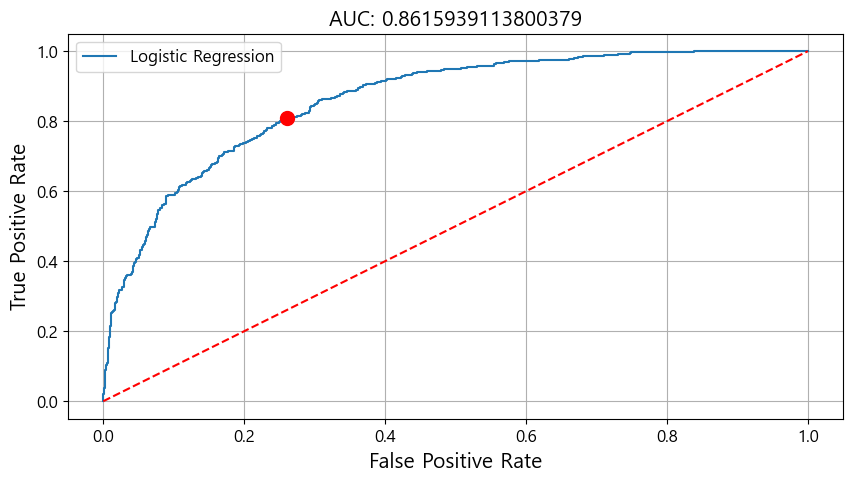

ROC Curve: Test


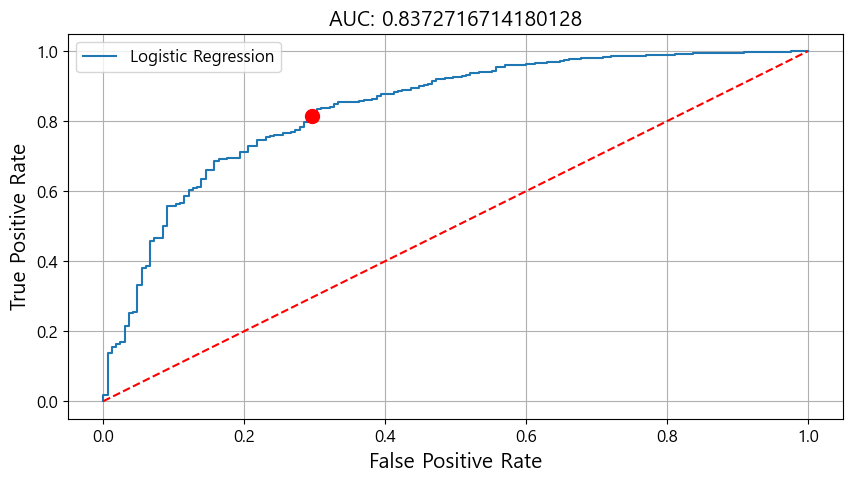

Precision-Recall Curve: Train


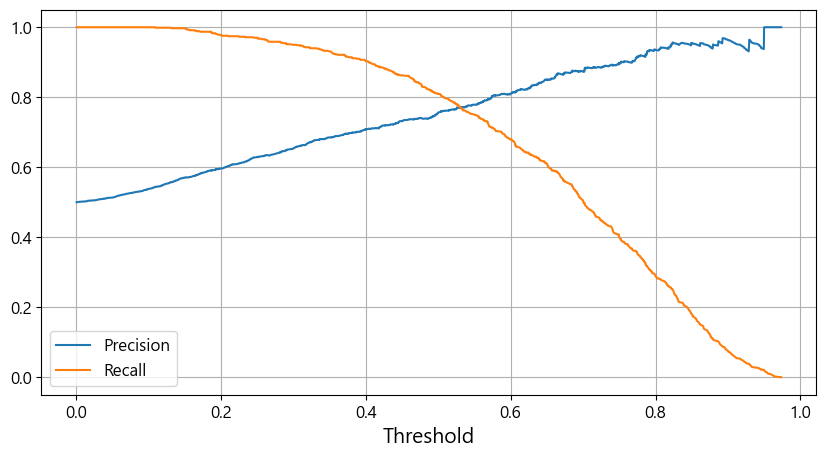

Precision-Recall Curve: Test


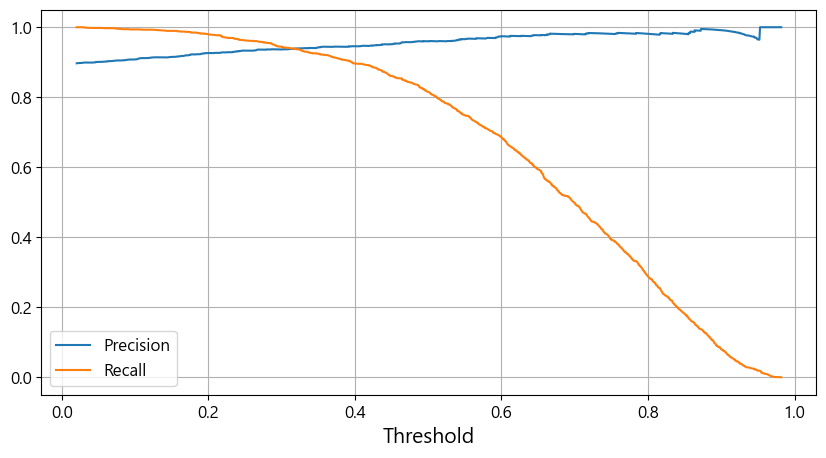

,Accuracy,ROC_AUC
Train,0.77,0.77
Test,0.80,0.76


In [71]:
# Logistic Regression
X_train_fes = sm.add_constant(X_train_fes, has_constant='add')
X_test_fes = sm.add_constant(X_test_fes)

model_logitreg = LogisticRegression(fit_intercept=False)
model_logitreg.fit(X_train_fes, Y_train)

## 계수 해석
print("Effect of X..")
display(pd.DataFrame({'features': X_train_fes.columns,
                      'coef': model_logitreg.coef_[0],
                      'odds': np.exp(model_logitreg.coef_[0])}))

# 예측
Y_trpred = model_logitreg.predict(X_train_fes)
Y_tepred = model_logitreg.predict(X_test_fes)
P_trpred = model_logitreg.predict_proba(X_train_fes)
P_tepred = model_logitreg.predict_proba(X_test_fes)

# 평가/검증
## Confusion Matrix
print('Confusion Matrix: Train')
evaluation_class_ConfusionMatrix(Y_train, Y_trpred)
print('Confusion Matrix: Test')
evaluation_class_ConfusionMatrix(Y_test, Y_tepred)

## Classification Metrics
print('Classification Metrics: Train')
evaluation_class_ClassificationReport(Y_train, Y_trpred)
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Train')
evaluation_class_ROCAUC(Y_train, P_trpred[:,1])
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1])

## Precision-Recall Curve
print('Precision-Recall Curve: Train')
evaluation_class_PrecisionRecall(Y_train, P_trpred[:,1])
print('Precision-Recall Curve: Test')
evaluation_class_PrecisionRecall(Y_test, P_tepred[:,1])

## 성능검증
Score_rf = evaluation_class_AccuracyAUC_trte(Y_train, Y_trpred, Y_test, Y_tepred)
Score_rf

### Random Forest

In [72]:
X_train_fes = X_train_fes.drop('const',axis=1)
X_test_fes = X_test_fes.drop('const',axis=1)

변수 중요도: 


,Importance
학습 지향 평균,0.15
직업관련 목표지향 평균,0.08
무형식학습(의존형) 참여,0.01
무형식학습(온라인) 참여,0.01
무형식학습 (암묵적 학습) 참여,0.02
...,...
형식교육 참여자,0.00
key,0.04
문D1-1) 귀하께서는 평생교육 프로그램 관련 정보를 어떻게 얻으셨습니까? (중복응답)1,0.03
DQ9-1. 귀하의 현재 종사상 지위는 어떻게 되십니까?,0.01


Confusion Matrix: Train


,Pred: 0,Pred: 1
True: 0,698,0
True: 1,0,698


Confusion Matrix: Test


,Pred: 0,Pred: 1
True: 0,122,43
True: 1,262,1173


Classification Metrics: Train
              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00       698
     class 1       1.00      1.00      1.00       698

    accuracy                           1.00      1396
   macro avg       1.00      1.00      1.00      1396
weighted avg       1.00      1.00      1.00      1396

Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.32      0.74      0.44       165
     class 1       0.96      0.82      0.88      1435

    accuracy                           0.81      1600
   macro avg       0.64      0.78      0.66      1600
weighted avg       0.90      0.81      0.84      1600

ROC Curve: Train


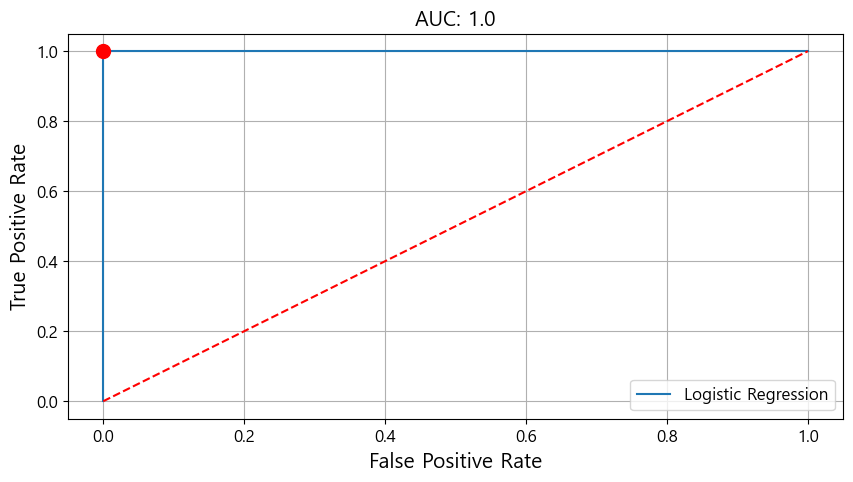

ROC Curve: Test


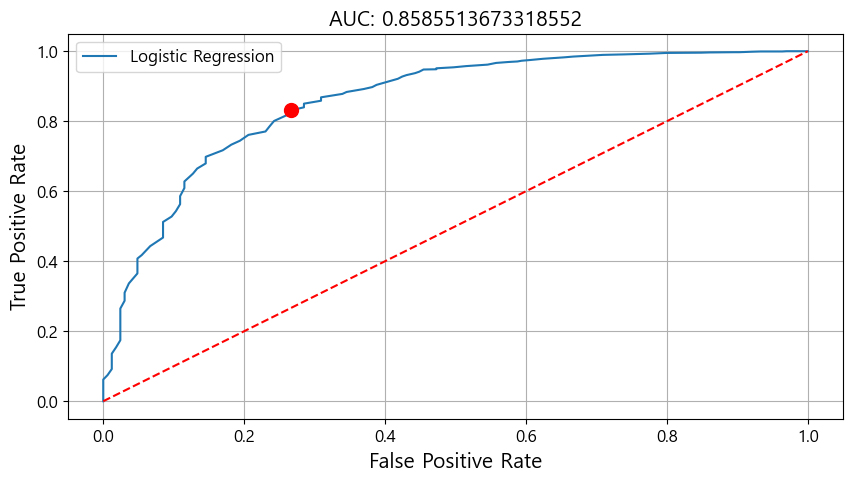

Precision-Recall Curve: Train


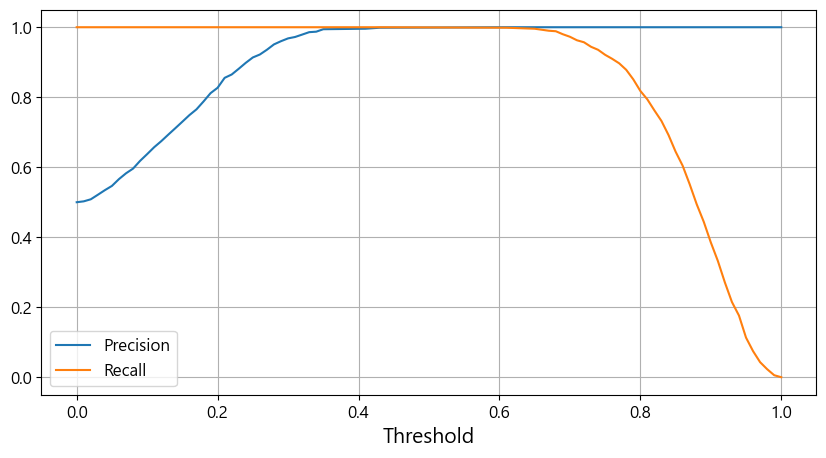

Precision-Recall Curve: Test


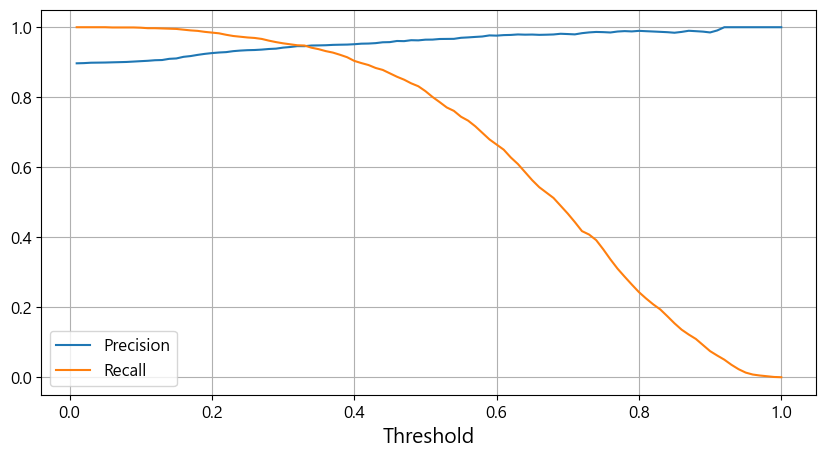

,Accuracy,ROC_AUC
Train,1.00,1.00
Test,0.81,0.78


In [73]:
# Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=123)
model_rf.fit(X_train_fes, Y_train)
print("변수 중요도: ")
display(pd.DataFrame(model_rf.feature_importances_,
                     index=model_rf.feature_names_in_, columns=['Importance']))

# 예측
Y_trpred = model_rf.predict(X_train_fes)
Y_tepred = model_rf.predict(X_test_fes)
P_trpred = model_rf.predict_proba(X_train_fes)
P_tepred = model_rf.predict_proba(X_test_fes)

# 평가/검증
## Confusion Matrix
print('Confusion Matrix: Train')
display(evaluation_class_ConfusionMatrix(Y_train, Y_trpred))
print('Confusion Matrix: Test')
display(evaluation_class_ConfusionMatrix(Y_test, Y_tepred))

## Classification Metrics
print('Classification Metrics: Train')
evaluation_class_ClassificationReport(Y_train, Y_trpred)
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Train')
evaluation_class_ROCAUC(Y_train, P_trpred[:,1])
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1])

## Precision-Recall Curve
print('Precision-Recall Curve: Train')
evaluation_class_PrecisionRecall(Y_train, P_trpred[:,1])
print('Precision-Recall Curve: Test')
evaluation_class_PrecisionRecall(Y_test, P_tepred[:,1])

# 성능검증
Score_trte = evaluation_class_AccuracyAUC_trte(Y_train, Y_trpred, Y_test, Y_tepred)
Score_trte

In [35]:
fi_rf = pd.DataFrame(model_rf.feature_importances_,
                     index=model_rf.feature_names_in_, columns=['Importance'])

fi_rf.sort_values(by='Importance', ascending=False)


,Importance
학습 지향 평균,0.16
문H1) 귀하께서는 전반적으로 현재의 생활에 얼마나 만족하십니까?,0.12
직업관련 목표지향 평균,0.08
문E1-4) 자신의 학습패턴에 관하여 어느 정도 동의하시는지 동의 정도를 말씀해주시기 바랍니다.__나는 다른 사람들과 함께 공부 하는 것이 좋다.,0.05
문E1-1) 자신의 학습패턴에 관하여 어느 정도 동의하시는지 동의 정도를 말씀해주시기 바랍니다.__나는 책이나 판서 수업 중심으로 공부하는 것이 익숙하고 잘된다.,0.04
...,...
무형식학습(의존형) 참여,0.01
경활상태,0.01
취업구분,0.00
형식교육 참여자,0.00


### XGBoost

변수 중요도(분류기준): 


,Importance
학습 지향 평균,0.19
직업관련 목표지향 평균,0.04
무형식학습(의존형) 참여,0.02
무형식학습(온라인) 참여,0.02
무형식학습 (암묵적 학습) 참여,0.03
...,...
형식교육 참여자,0.01
key,0.03
문D1-1) 귀하께서는 평생교육 프로그램 관련 정보를 어떻게 얻으셨습니까? (중복응답)1,0.02
DQ9-1. 귀하의 현재 종사상 지위는 어떻게 되십니까?,0.00


변수 중요도(성능기준): 
Confusion Matrix: Train


,Pred: 0,Pred: 1
True: 0,560,138
True: 1,85,613


Confusion Matrix: Test


,Pred: 0,Pred: 1
True: 0,117,48
True: 1,251,1184


Classification Metrics: Train
              precision    recall  f1-score   support

     class 0       0.87      0.80      0.83       698
     class 1       0.82      0.88      0.85       698

    accuracy                           0.84      1396
   macro avg       0.84      0.84      0.84      1396
weighted avg       0.84      0.84      0.84      1396

Classification Metrics: Test
              precision    recall  f1-score   support

     class 0       0.32      0.71      0.44       165
     class 1       0.96      0.83      0.89      1435

    accuracy                           0.81      1600
   macro avg       0.64      0.77      0.66      1600
weighted avg       0.89      0.81      0.84      1600

ROC Curve: Train


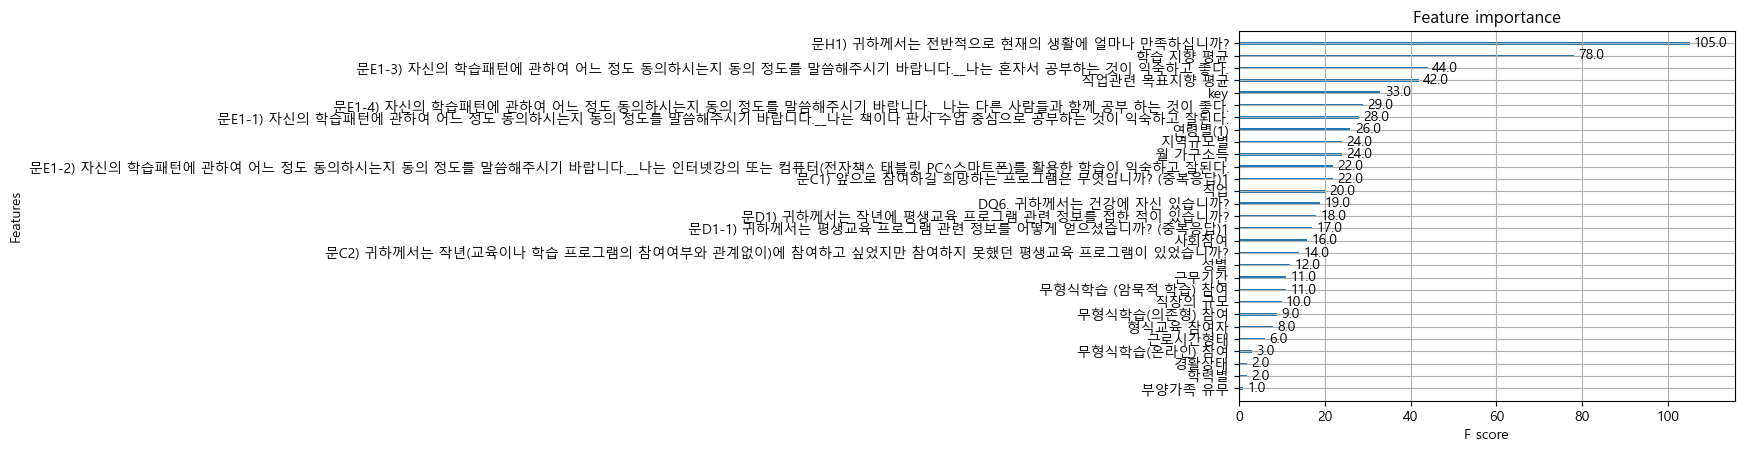

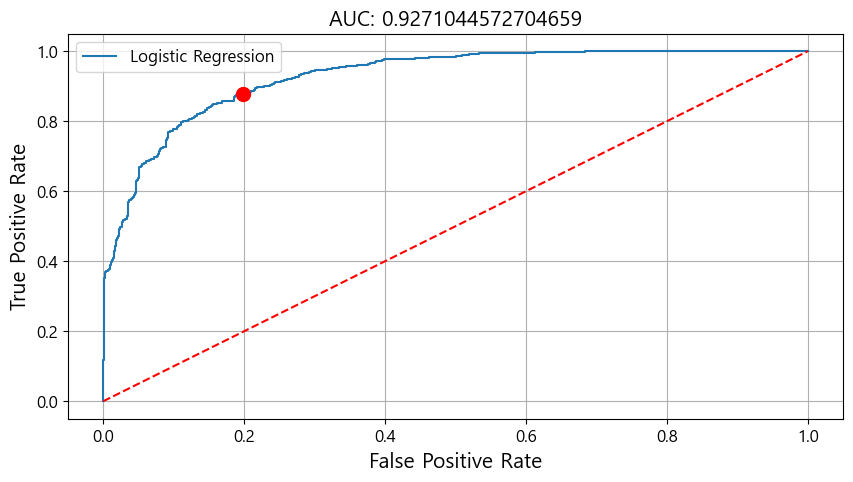

ROC Curve: Test


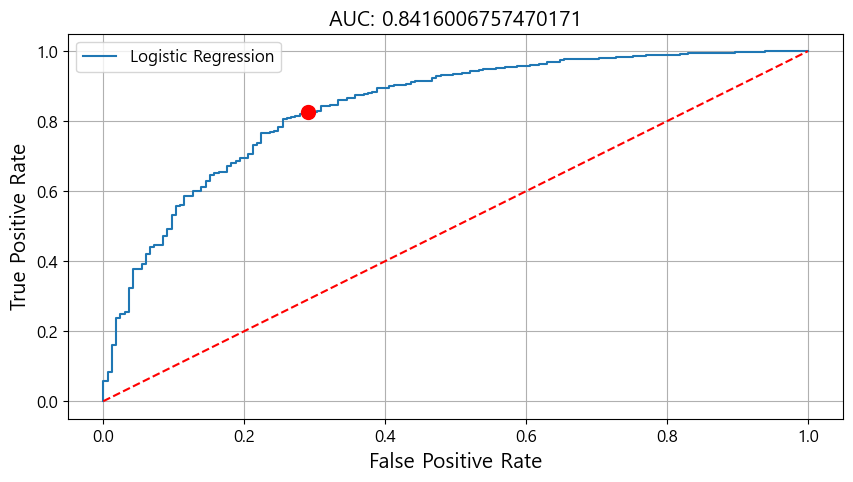

Precision-Recall Curve: Train


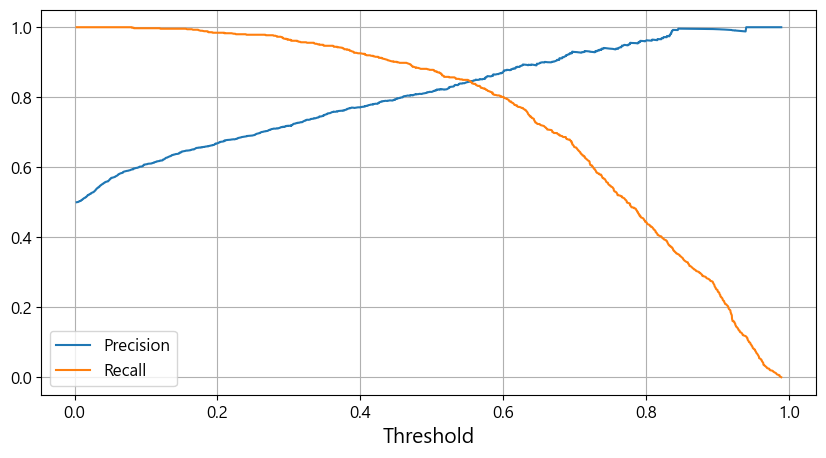

Precision-Recall Curve: Test


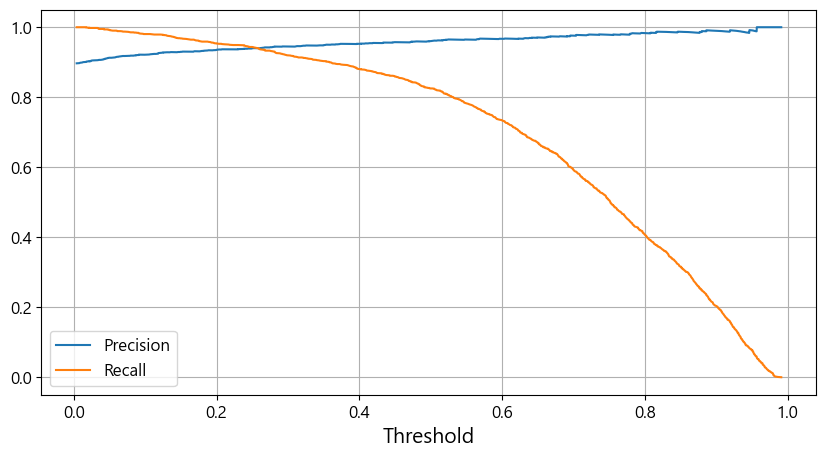

,Accuracy,ROC_AUC
Train,0.84,0.84
Test,0.81,0.77


In [74]:
# XGBoost
model_xgb = XGBClassifier(n_estimators=100,
                          learning_rate=0.1,
                          max_depth=3, random_state=123,
                          eval_metric='mlogloss')
model_xgb.fit(X_train_fes, Y_train)
print("변수 중요도(분류기준): ")
display(pd.DataFrame(model_xgb.feature_importances_, 
                     index=model_xgb.feature_names_in_, columns=['Importance']))
print("변수 중요도(성능기준): ")
plot_importance_xgb(model_xgb)

# 예측
Y_trpred = model_xgb.predict(X_train_fes)
Y_tepred = model_xgb.predict(X_test_fes)
P_trpred = model_xgb.predict_proba(X_train_fes)
P_tepred = model_xgb.predict_proba(X_test_fes)

# 평가/검증
## Confusion Matrix
print('Confusion Matrix: Train')
display(evaluation_class_ConfusionMatrix(Y_train, Y_trpred))
print('Confusion Matrix: Test')
display(evaluation_class_ConfusionMatrix(Y_test, Y_tepred))

## Classification Metrics
print('Classification Metrics: Train')
evaluation_class_ClassificationReport(Y_train, Y_trpred)
print('Classification Metrics: Test')
evaluation_class_ClassificationReport(Y_test, Y_tepred)

## ROC Curve + AUC
print('ROC Curve: Train')
evaluation_class_ROCAUC(Y_train, P_trpred[:,1])
print('ROC Curve: Test')
evaluation_class_ROCAUC(Y_test, P_tepred[:,1])

## Precision-Recall Curve
print('Precision-Recall Curve: Train')
evaluation_class_PrecisionRecall(Y_train, P_trpred[:,1])
print('Precision-Recall Curve: Test')
evaluation_class_PrecisionRecall(Y_test, P_tepred[:,1])

## 성능검증
Score_rf = evaluation_class_AccuracyAUC_trte(Y_train, Y_trpred, Y_test, Y_tepred)
Score_rf

### 최종

In [75]:
# # Logistic Regression
# X_train_fes = sm.add_constant(X_train_fes, has_constant='add')
# X_test_fes = sm.add_constant(X_test_fes)

# model_logitreg = LogisticRegression(fit_intercept=False)
# model_logitreg.fit(X_train_fes, y)

# XGBoost
model_xgb = XGBClassifier(n_estimators=100,
                          learning_rate=0.1,
                          max_depth=3, random_state=123,
                          eval_metric='mlogloss')

# LightGBM
model_lgbm = LGBMClassifier(n_estimators=100,
                            learning_rate=0.1,
                            max_depth=3, random_state=123)

# CatBoost
model_cb = CatBoostClassifier(n_estimators=100,
                              learning_rate=0.1,
                              max_depth=3, random_state=123,
                              verbose=0)

In [76]:
# 모델 정의
models = {
#     'Logistic Regression': model_logitreg,
    'Random Forest': model_rf,
    'XGBoost': model_xgb,
    'LightGBM': model_lgbm,
    'CatBoost': model_cb
    }

# 모델 학습 및 평가
results = []

for name, model in models.items():
    print(f'------{name}------')

    model.fit(X_train_fes, Y_train)
    y_pred = model.predict(X_test_fes)

    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test_fes)[:, 1]
    else:
        y_pred_proba = model.decision_function(X_test_fes)


        # 평가 지표
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)


    cm = confusion_matrix(Y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp)


    fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # 결과 저장
    results.append({
        'Algorithm': name,
        'Precision': precision,
        'Recall': recall,
        'Specificity': specificity,
        'F1-score': f1,
        'Accuracy': accuracy,
        'AUC': roc_auc
    })

results_df = pd.DataFrame(results)

print('X_Train shape:', X_train_fes.shape, 'Y_train_shape:', Y_train.shape)
print('X_Test shape:', X_test_fes.shape, 'Y_test_shape:', Y_test.shape)

# Set pandas display option for decimal places
pd.set_option('display.float_format', '{:.5f}'.format)
display(results_df)

------Random Forest------
------XGBoost------
------LightGBM------
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 698, number of negative: 698
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000731 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 152
[LightGBM] [Info] Number of data points in the train set: 1396, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

,Algorithm,Precision,Recall,Specificity,F1-score,Accuracy,AUC
0,Random Forest,0.96464,0.81742,0.73939,0.88495,0.80937,0.85855
1,XGBoost,0.96104,0.82509,0.70909,0.88789,0.81312,0.84160
2,LightGBM,0.96094,0.82300,0.70909,0.88664,0.81125,0.84026
3,CatBoost,0.96259,0.80697,0.72727,0.87794,0.79875,0.84639


## SHAP

In [43]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
import shap

In [77]:
# XGB 
explainer = shap.TreeExplainer(model_xgb)
shap_values = explainer.shap_values(X_test_fes)

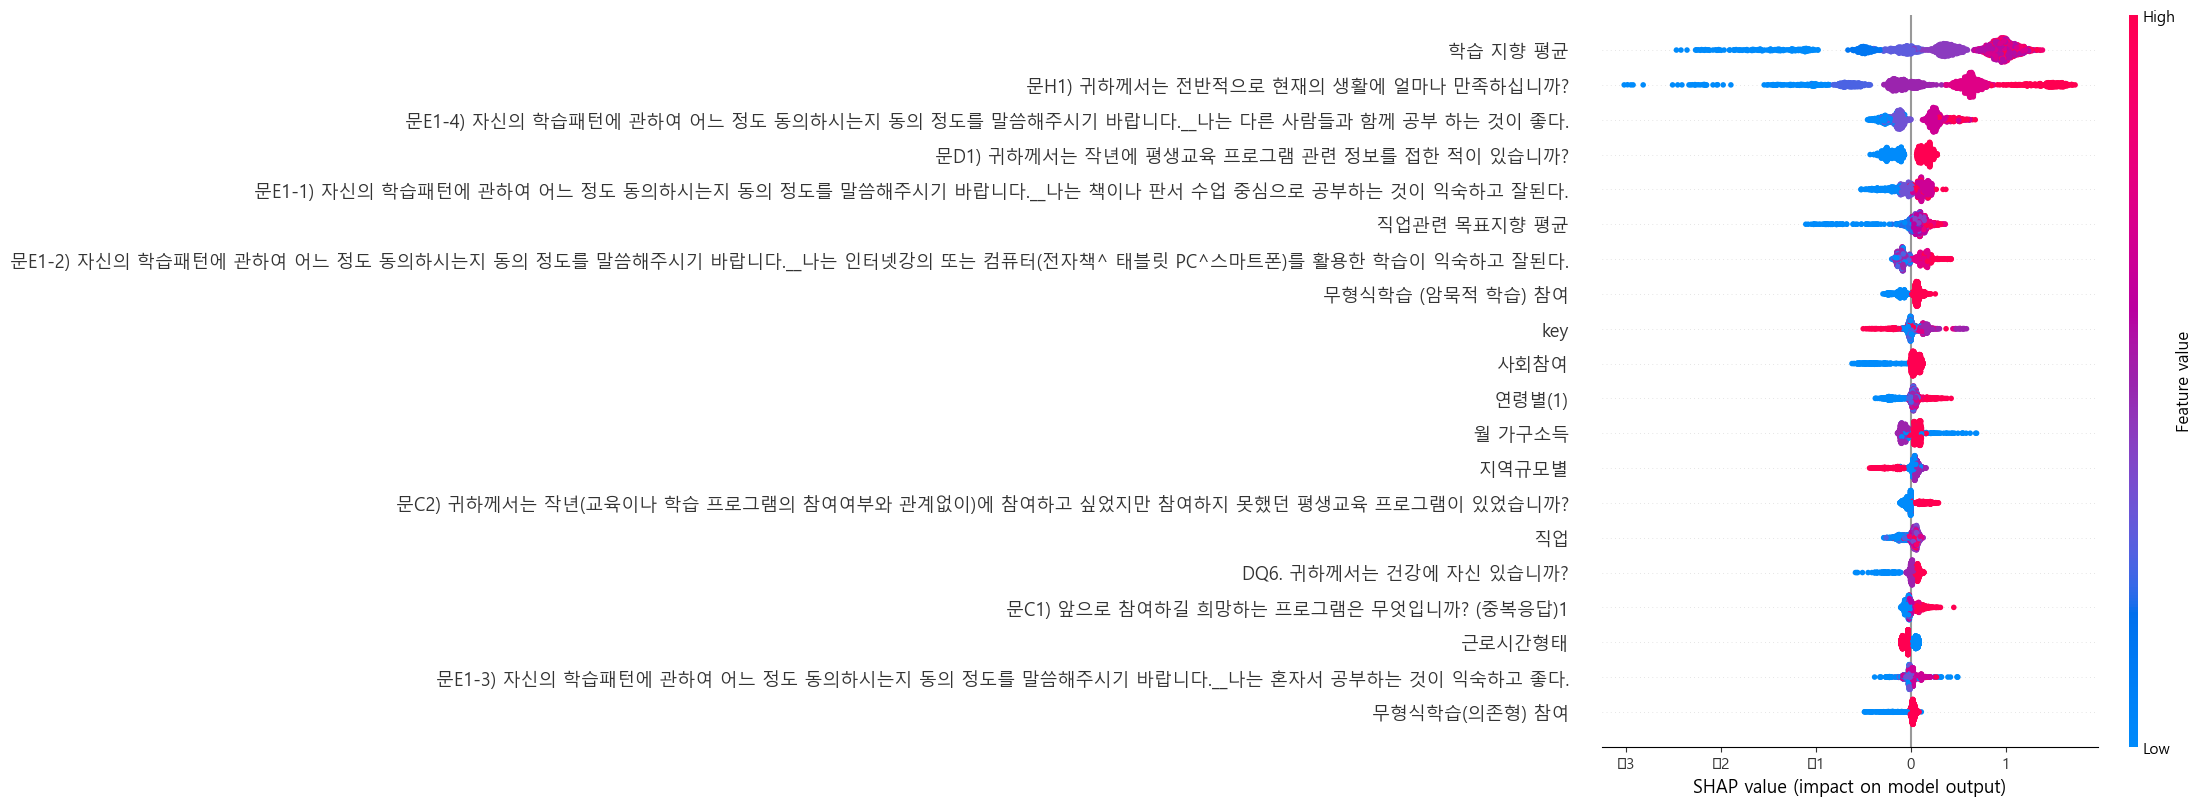

In [78]:
shap.summary_plot(shap_values, X_test_fes)

## 미참여자들 만족도 예측

In [79]:
df_new_n = df_new_n.drop('비형식교육 참여자', axis=1)

In [80]:
df_new_n.isna().sum()

평생학습 만족도                                             0
학습 지향 평균                                             0
직업관련 목표지향 평균                                         0
무형식학습(의존형) 참여                                        0
무형식학습(온라인) 참여                                        0
                                                    ..
형식교육 참여자                                             0
key                                                  0
문D1-1) 귀하께서는 평생교육 프로그램 관련 정보를 어떻게 얻으셨습니까? (중복응답)1    0
DQ9-1. 귀하의 현재 종사상 지위는 어떻게 되십니까?                      0
DQ9-2. 귀하의 현재 근로시간형태는 어떻게 되십니까?                      0
Length: 33, dtype: int64

In [83]:
# 종속변수, 독립변수 분리
Y_test2 = df_new_n['평생학습 만족도']
X_test2 =  df_new_n.drop('평생학습 만족도', axis=1)

# 스케일링
scaler = preprocessing.MinMaxScaler()
X_train_fes , X_test2_fes = scale(scaler, X_train, X_test2)

In [84]:
# 비형식교육 미참여자들의 평생학습 만족도 예측 

Y_te2pred = model_xgb.predict(X_test2_fes)
P_te2pred = model_xgb.predict_proba(X_test2_fes)

In [85]:
Y_test2.value_counts()

1.00000    9358
0.00000    3156
Name: 평생학습 만족도, dtype: int64

In [86]:
df_new_n['만족도 예측'] = Y_te2pred
df_new_n

,평생학습 만족도,학습 지향 평균,직업관련 목표지향 평균,무형식학습(의존형) 참여,무형식학습(온라인) 참여,무형식학습 (암묵적 학습) 참여,사회참여,문D1) 귀하께서는 작년에 평생교육 프로그램 관련 정보를 접한 적이 있습니까?,문H1) 귀하께서는 전반적으로 현재의 생활에 얼마나 만족하십니까?,문C1) 앞으로 참여하길 희망하는 프로그램은 무엇입니까? (중복응답)1,...,근로시간형태,직업,직장의 규모,근무기간,형식교육 참여자,key,문D1-1) 귀하께서는 평생교육 프로그램 관련 정보를 어떻게 얻으셨습니까? (중복응답)1,DQ9-1. 귀하의 현재 종사상 지위는 어떻게 되십니까?,DQ9-2. 귀하의 현재 근로시간형태는 어떻게 되십니까?,만족도 예측
0,1.00000,4.00000,4.33333,0,1,0,1,0,6,0.00000,...,0.00000,9.00000,1.00000,2.00000,0,2022,0.00000,0.00000,0.00000,0
1,0.00000,3.50000,3.33333,1,0,0,1,0,8,4.00000,...,0.00000,0.00000,0.00000,0.00000,0,2022,0.00000,0.00000,0.00000,0
2,0.00000,3.75000,2.33333,1,1,0,1,0,8,0.00000,...,0.00000,5.00000,1.00000,5.00000,0,2022,0.00000,0.00000,0.00000,0
3,1.00000,4.25000,4.00000,1,0,0,1,0,6,4.00000,...,0.00000,5.00000,1.00000,2.00000,0,2022,0.00000,0.00000,0.00000,1
4,1.00000,3.75000,4.00000,1,1,1,1,0,9,0.00000,...,0.00000,4.00000,1.00000,2.00000,0,2022,0.00000,0.00000,0.00000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20502,1.00000,3.50000,4.33333,1,1,1,1,0,6,0.00000,...,0.00000,5.00000,1.00000,3.00000,0,2018,0.00000,0.00000,0.00000,0
20503,1.00000,4.25000,4.66667,1,1,0,1,0,7,0.00000,...,1.00000,3.00000,1.00000,3.00000,0,2018,0.00000,1.00000,1.00000,1
20504,1.00000,3.00000,3.66667,1,1,1,1,0,7,0.00000,...,1.00000,7.00000,3.00000,2.00000,0,2018,0.00000,1.00000,1.00000,0
20505,1.00000,3.25000,4.00000,1,1,0,1,0,7,0.00000,...,1.00000,7.00000,2.00000,6.00000,0,2018,0.00000,1.00000,1.00000,0


###  만족도 예측값과 본인의 예상값 차이

In [ ]:
### 만족도 예측값과 본인의 예상치 차이 컬럼
df_new_n['차이'] = df_new_n['만족도 예측'] - df_new_n['평생학습 만족도']

In [88]:
df_new_n['차이']

0       -1.00000
1        0.00000
2        0.00000
3        0.00000
4        0.00000
          ...   
20502   -1.00000
20503    0.00000
20504   -1.00000
20505   -1.00000
20512    0.00000
Name: 차이, Length: 12514, dtype: float64

In [89]:
# 차이 통계 요약
print(df_new_n['차이'].describe())

count   12514.00000
mean       -0.22719
std         0.49169
min        -1.00000
25%        -1.00000
50%         0.00000
75%         0.00000
max         1.00000
Name: 차이, dtype: float64


In [91]:
# 차이 통계
df_new_n['차이'].value_counts()

0.00000     8843
-1.00000    3257
1.00000      414
Name: 차이, dtype: int64

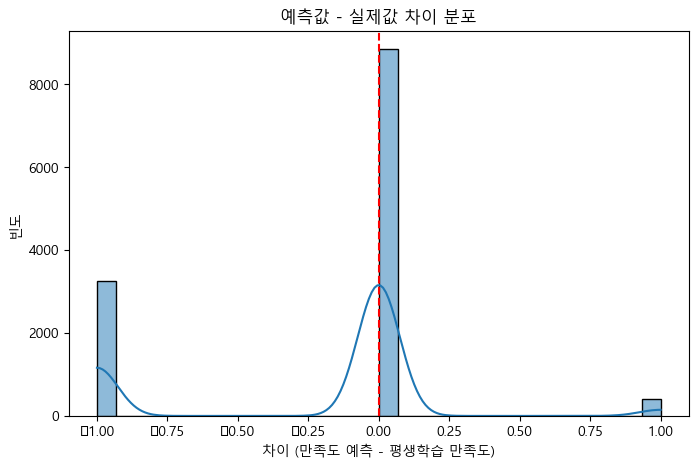

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df_new_n['차이'], bins=30, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title('예측값 - 실제값 차이 분포')
plt.xlabel('차이 (만족도 예측 - 평생학습 만족도)')
plt.ylabel('빈도')
plt.show()
